In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json



In [5]:
def convert_bytes(size):
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024.0:
            return "%3.2f %s" % (size, x)
        size /= 1024.0

    return size

In [39]:
with open('./callback_memory.json', 'r') as f:
    js = json.load(f)

In [40]:
for i in list(js.keys())[:-2]:
    txt = i +' : '
    for k in list(js[i]):
        txt += k + ' : ' + convert_bytes(js[i][k]) + ' | '
    print(txt)

model : max : 91.57 MB | cur : 91.57 MB | 
input : max : 91.77 MB | cur : 91.77 MB | 
output : max : 2.80 GB | cur : 2.80 GB | 
forward : max : 5.57 GB | cur : 5.57 GB | 
loss : max : 5.76 GB | cur : 5.57 GB | 
backward : max : 8.67 GB | cur : 182.43 MB | 
step : max : 8.67 GB | cur : 182.43 MB | 


In [41]:
f_max = []
f_cur = []
for j in js['hookF']:
    f_max.append(j['max'][0])
    f_cur.append(j['cur'][0])
    print(convert_bytes(j['max'][0]), convert_bytes(j['cur'][0]))

2.82 GB 2.81 GB
2.82 GB 2.81 GB
2.82 GB 2.81 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.83 GB 2.83 GB
2.88 GB 2.86 GB
2.88 GB 2.86 GB
2.88 GB 2.86 GB
5.57 GB 5.57 GB


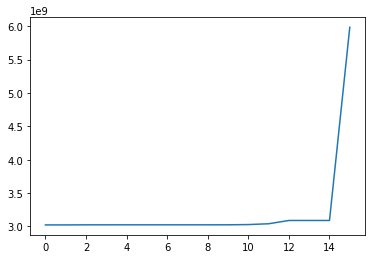

In [42]:
plt.plot(f_max)
#plt.plot(f_cur)
plt.show()

In [43]:
b_max = []
b_cur = []
for j in js['hookB']:
    b_max.append(j['max'][0])
    b_cur.append(j['cur'][0])
    print(convert_bytes(j['max'][0]), convert_bytes(j['cur'][0]))

8.67 GB 207.92 MB
8.67 GB 223.62 MB
8.67 GB 222.74 MB
8.67 GB 226.32 MB
8.67 GB 223.67 MB
8.67 GB 224.48 MB
8.67 GB 213.78 MB
8.67 GB 213.95 MB
8.67 GB 173.06 MB
8.67 GB 146.68 MB
8.67 GB 143.67 MB
8.67 GB 156.00 MB
8.67 GB 167.95 MB
8.67 GB 158.82 MB
8.67 GB 2.87 GB
8.67 GB 5.57 GB


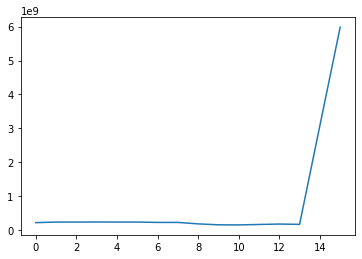

In [44]:
#plt.plot(f_max)
plt.plot(b_cur)
plt.show()

In [49]:
print(f_cur[-1])
print(b_cur)

[3016197632, 3019343872, 3022543872, 3023096832, 3023834112, 3023944704, 3024092160, 3024119808, 3024156672, 3024525312, 3026862592, 3035154432, 3069443072, 3072550912, 3075464192, 5982116864]
[218021888, 234485248, 233562112, 237315072, 234532352, 235380224, 224163328, 224338432, 181471744, 153803264, 150643712, 163582976, 176111104, 166537216, 3079210496, 5982117888]


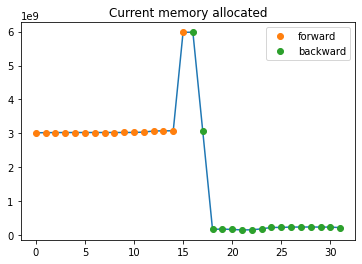

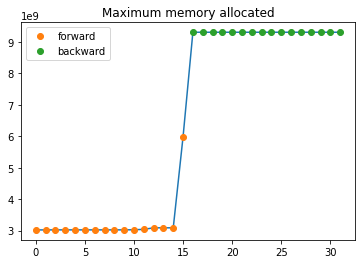

In [50]:
x1, x2 = list(range(len(f_cur))), list(range(len(f_cur),len(f_cur)+len(b_cur)))
plt.plot(x1+x2,f_cur + list(reversed(b_cur)))
plt.plot(x1,f_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,f_max + list(reversed(b_max)))
plt.plot(x1,f_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()

In [47]:
print(x1 , x2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
